# 3 - Monte Carlo Integration (I)

##### Imports:

In [2]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import statistics 
import time

##### Functions:

In [3]:
def g(x, y, z):
    return (x + y + z)**2

In [4]:
# exact integral:
exact = 3*(2*np.pi)**1.5

def exact_function(x):
    return exact

In [5]:
exact

47.24882983716726

In [6]:
def exact_vector(length):
    return np.array([exact for i in range(length)])

In [7]:
def approximate_integral(npts, nrep):
    I = []
    for k in range(nrep):
        s = 0
        for i in range(npts):
            x = random.gauss(0,1); y = random.gauss(0,1); z = random.gauss(0,1);
            s += g(x, y, z)
        I.append(s*(2*np.pi)**1.5/npts)
    return I

## 3.1 - Some title

In [8]:
#Number of points per run: npts
#Number of replicas: nrep
npts=5000; nrep=100;

# Approximate the integral
I = approximate_integral(npts, nrep)

In [9]:
print(np.mean(I))

47.22887517970285


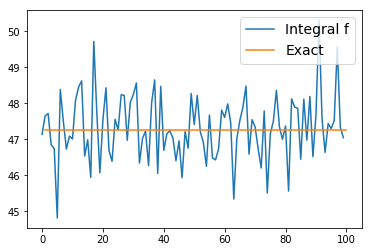

Integral f1 = 47.3284 exact value is 47.24882983716726 Relative fluct. = 0.0191


In [13]:
# Plot

plt.plot(I, label = "Integral f")
t1 = np.arange(1, nrep+1, 1)
plt.plot(t1, exact_vector(len(t1)), label = "Exact")
plt.legend(loc="upper right",fontsize=14)
#plt.ylim(0.9,1.1)
plt.show()

print("Integral f1 =", round(np.mean(I), 4), "exact value is", exact, "Relative fluct. =", round(np.std(I)/np.mean(I), 4))

## 2.3 - Variances

In [40]:
npts_list = np.arange(50, 6000, 50)
npts_list[0]

50

In [37]:
# Warning:This command block takes a bit of time...
nrep = 100
var = []
start = time.time()
for npts in npts_list:
    I = approximate_integral(npts, nrep)
    var.append(1/round(np.std(I)/np.mean(I), 4))
end = time.time()
print("Elapsed time was ", end - start, " seconds.")

Elapsed time was  93.7310106754303  seconds.


In [38]:
# Calculate fit
z = np.polyfit(npts_list, var, 1)
fit = np.poly1d(z)

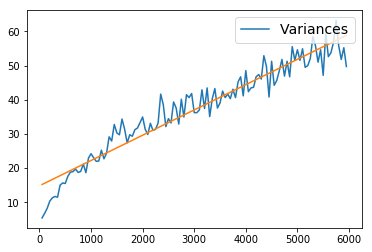

In [39]:
plt.plot(npts_list, var, label = "1 / Variances")
t1 = np.arange (npts_list[0], npts_list[-1], 1)
plt.plot(t1, fit(t1))
plt.legend(loc="upper right",fontsize=14)
#plt.ylim(0.9,1.1)
plt.show()
